In [1]:
# Monkey-patch to restore the missing helper
import pandas.core.dtypes.common as pdc
from pandas.api.types import is_datetime64_any_dtype, is_timedelta64_dtype

pdc.is_datetime_or_timedelta_dtype = (
    lambda arr: is_datetime64_any_dtype(arr) or is_timedelta64_dtype(arr)
)

In [2]:
import numpy as np
import pandas as pd

# Ensure reproducibility and access to existing series
np.random.seed(123)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Generate 36 monthly periods starting January 2022
periods = 36
dates = pd.date_range(start='2022-01-01', periods=periods, freq='MS')
t = np.arange(periods)

# Components: trend + seasonality + noise
baseline = 50 + 0.5 * t
seasonality = 10 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(scale=2, size=periods)

# Create a causal shock: +20 from month 24 onward
shock_start = 23  # zero-based index: month 24
shock = np.zeros(periods)
shock[shock_start:] = 30

# Combine into the observed series
Y = baseline + seasonality + noise + shock

# Build DataFrame
df = pd.DataFrame({
    'date': dates,
    'Y': Y,
    'shock': shock > 0
})

# 'df', 't', and 'periods' from previous cell are available in this environment
# Generate 10 control series X1–X10 with trend, seasonality, and idiosyncratic noise
for i in range(1, 11):
    intercept = 50 + np.random.normal(scale=5)
    slope = 0.5 + np.random.normal(scale=0.05)
    phase = np.random.uniform(0, 2 * np.pi)
    noise = np.random.normal(scale=2, size=periods)
    df[f'X{i}'] = intercept + slope * t + 10 * np.sin(2 * np.pi * t / 12 + phase) + noise

In [3]:
df.head(50)

,date,Y,shock,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,2022-01-01,50.993428,False,48.588653,67.473352,64.080306,39.150618,47.066542,50.293696,47.011890,41.929331,49.252999,36.920765
1,2022-02-01,55.223471,False,45.918295,62.664476,68.041871,42.751803,41.553612,53.078514,46.450669,46.346653,55.862958,46.641384
2,2022-03-01,60.955631,False,40.093766,58.941038,65.256656,42.040701,44.054034,52.378064,49.211403,52.481792,62.341553,48.948215
3,2022-04-01,64.546060,False,39.511376,55.061469,60.887531,50.195536,43.479791,58.928730,52.142153,58.138402,62.770832,57.278792
4,2022-05-01,60.191947,False,47.356312,53.390829,51.790309,56.526511,48.983883,60.902135,53.522360,57.849333,60.971631,56.245127
5,2022-06-01,57.031726,False,49.697276,49.041982,50.309733,57.732943,54.761683,68.010477,65.439523,63.552354,56.702042,60.760381
6,2022-07-01,56.158426,False,53.656002,46.463941,47.982981,64.776801,56.324754,74.109377,65.987635,54.759828,49.000175,61.842676
7,2022-08-01,50.034869,False,59.388813,50.368444,52.301487,64.648455,65.478460,77.653630,73.529490,50.112460,45.761204,59.311322
8,2022-09-01,44.400797,False,61.735760,53.680955,57.771159,63.793959,66.795525,73.709837,70.093374,50.271113,43.822894,54.045353
9,2022-10-01,45.585120,False,64.503727,60.919032,61.523688,62.190437,63.378122,73.103543,65.889759,45.972842,44.894568,51.537096


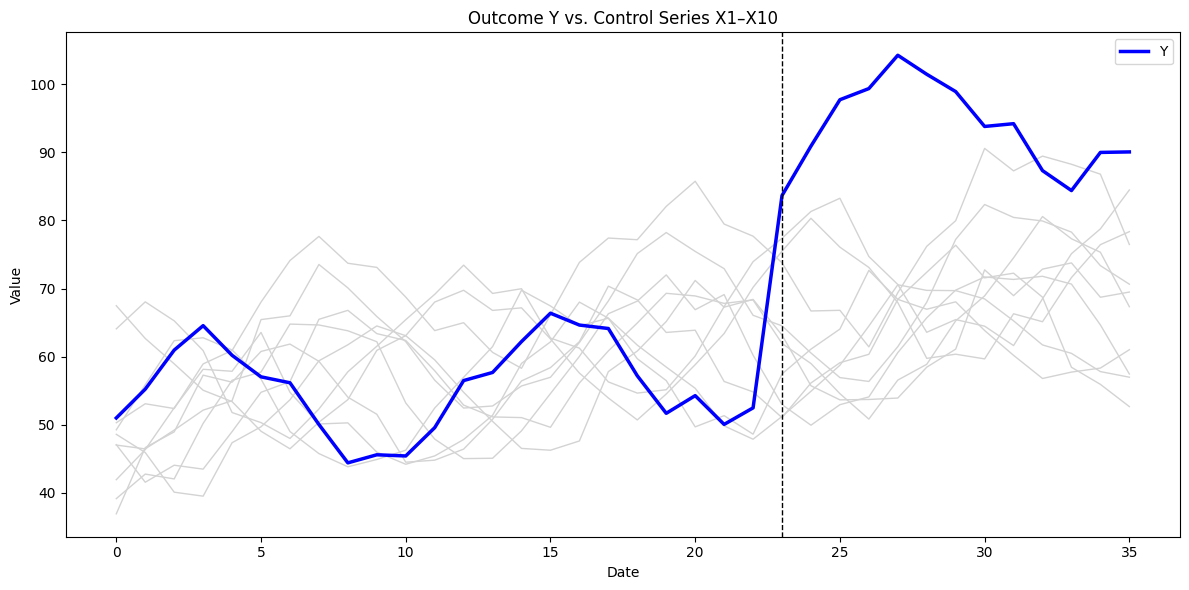

In [4]:
# Plot control series X1–X10 in light grey
plt.figure(figsize=(12, 6))
for i in range(1, 11):
    plt.plot(df.index, df[f'X{i}'], color='lightgrey', linewidth=1, label='_nolegend_')

# Plot Y with a distinct bold blue line
plt.plot(df.index, df['Y'], color='blue', linewidth=2.5, label='Y')

# Add intervention marker
plt.axvline(df.index[23], linestyle='--', color='black', linewidth=1)

# Legend and labels
plt.title('Outcome Y vs. Control Series X1–X10')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
df2 = df.drop(columns=['shock','date'])
pre_period  = [0, 22]        
post_period = [23, len(df2)-1]

In [6]:
df2.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,50.993428,48.588653,67.473352,64.080306,39.150618,47.066542,50.293696,47.011890,41.929331,49.252999,36.920765
1,55.223471,45.918295,62.664476,68.041871,42.751803,41.553612,53.078514,46.450669,46.346653,55.862958,46.641384
2,60.955631,40.093766,58.941038,65.256656,42.040701,44.054034,52.378064,49.211403,52.481792,62.341553,48.948215
3,64.546060,39.511376,55.061469,60.887531,50.195536,43.479791,58.928730,52.142153,58.138402,62.770832,57.278792
4,60.191947,47.356312,53.390829,51.790309,56.526511,48.983883,60.902135,53.522360,57.849333,60.971631,56.245127


In [37]:
from causalimpact import CausalImpact
impact = CausalImpact(df2, pre_period, post_period, model_args={"nseasons":12, "prior_level_sd": 0.1})
impact.run()

C:\Users\gcabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\causalimpact\misc.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mu = data_mu[0]
C:\Users\gcabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\causalimpact\misc.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_sd = data_sd[0]


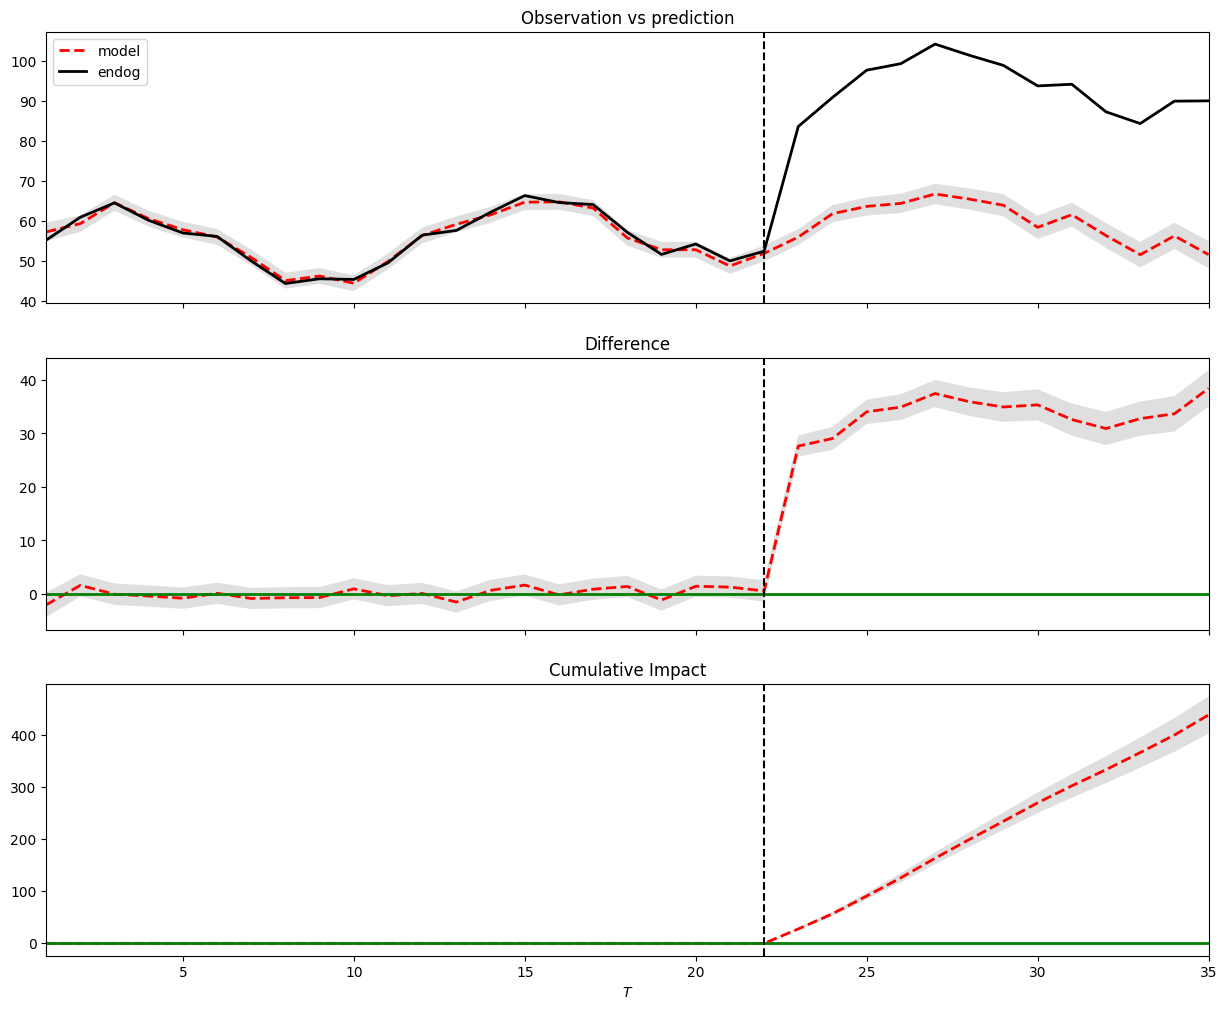

In [38]:
impact.plot()

<Figure size 1200x800 with 0 Axes>

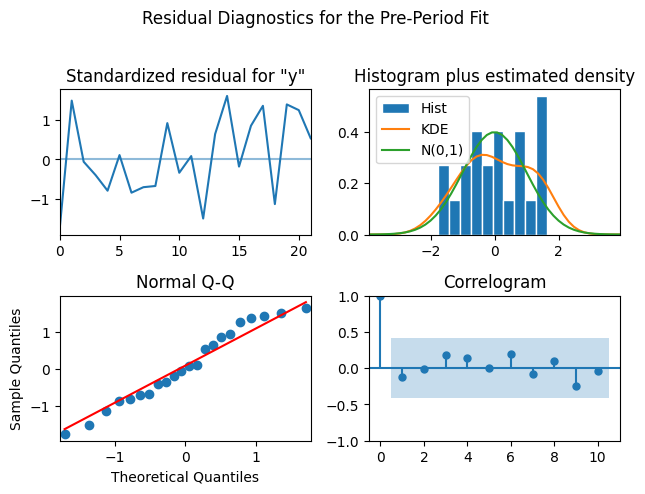

In [32]:
plt.figure(figsize=(12, 8))
# this draws the 4 residual‐diagnostic subplots
impact.results.results.plot_diagnostics()
plt.suptitle("Residual Diagnostics for the Pre-Period Fit", y=1.02)
plt.tight_layout()